In [1]:
### IMPORT LIBRARIES ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

## import the dataset

In [3]:
data = pd.read_csv('../dataset/SeoulBikeData.csv', encoding='Windows-1252')
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## drop two columns "Functioning Day" and "Dew point temperature°C"

In [6]:
data = data.drop(columns=['Functioning Day', 'Dew point temperature(°C)'])
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday


## converting the 'Date' column to 'datetime'

In [9]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     8760 non-null   datetime64[ns]
 1   Rented Bike Count        8760 non-null   int64         
 2   Hour                     8760 non-null   int64         
 3   Temperature(°C)          8760 non-null   float64       
 4   Humidity(%)              8760 non-null   int64         
 5   Wind speed (m/s)         8760 non-null   float64       
 6   Visibility (10m)         8760 non-null   int64         
 7   Solar Radiation (MJ/m2)  8760 non-null   float64       
 8   Rainfall(mm)             8760 non-null   float64       
 9   Snowfall (cm)            8760 non-null   float64       
 10  Seasons                  8760 non-null   object        
 11  Holiday                  8760 non-null   object        
dtypes: datetime64[ns](1), float64(5), 

## feature engineering: Divide the date into 'weekday' and 'weekend'
## Also, we then drop the original 'Date' column

In [14]:
data['DayType'] = data['Date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
data['WeekNumber'] = data['Date'].dt.isocalendar().week
data.drop(columns=['Date'], inplace=True)


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  DayType                  8760 non-null   object 
 12  WeekNumber               8760 non-null   UInt32 
dtypes: UInt32(1), float64(5), int64(4), object(3)
memory usage: 864.2+ KB


## One-hot encoding for categorical features

In [19]:
data = pd.get_dummies(data, columns=['DayType','Holiday', 'Seasons'], drop_first=True)
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),WeekNumber,DayType_Weekend,Holiday_No Holiday,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,48,False,True,False,False,True
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,48,False,True,False,False,True
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,48,False,True,False,False,True
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,48,False,True,False,False,True
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,48,False,True,False,False,True


## Train and test split

In [22]:
X = data.drop('Rented Bike Count', axis=1)
y = data['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7008, 14), (1752, 14), (7008,), (1752,))

## Apply scaling and checking the dataframe shapes

In [25]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((7008, 14), (1752, 14))

# LINEAR REGRESSION MODEL

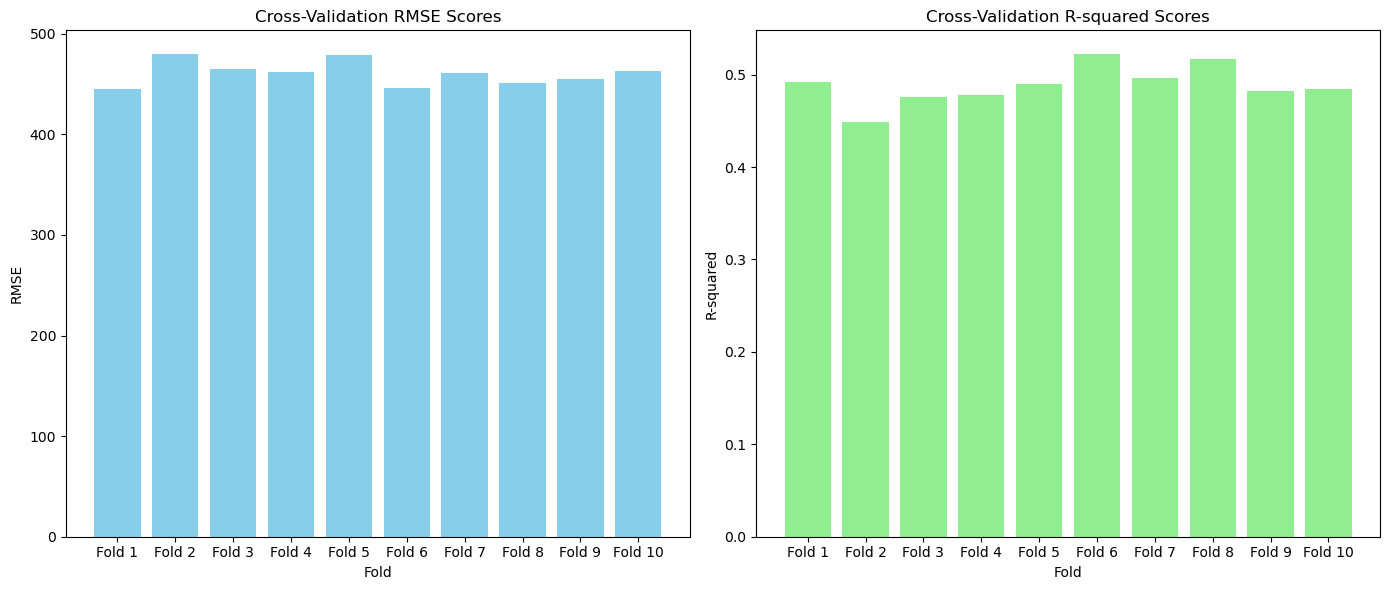

Mean CV RMSE: 460.7006081567923
Mean CV R-squared: 0.48865786850825527


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize a Linear Regression model
regressor = LinearRegression()

# Define scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform K-Fold Cross Validation for RMSE on scaled data
cv_mse_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=mse_scorer)
cv_rmse_scores = (-cv_mse_scores)**0.5

# Perform K-Fold Cross Validation for R-squared on scaled data
cv_r2_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=r2_scorer)

# Plot RMSE
plt.figure(figsize=(14, 6))

# Plot RMSE
plt.subplot(1, 2, 1)
plt.bar(np.arange(len(cv_rmse_scores)), cv_rmse_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores')
plt.xticks(np.arange(len(cv_rmse_scores)), [f'Fold {i+1}' for i in range(len(cv_rmse_scores))])

# Plot R-squared
plt.subplot(1, 2, 2)
plt.bar(np.arange(len(cv_r2_scores)), cv_r2_scores, color='lightgreen')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('Cross-Validation R-squared Scores')
plt.xticks(np.arange(len(cv_r2_scores)), [f'Fold {i+1}' for i in range(len(cv_r2_scores))])

# Show plots
plt.tight_layout()
plt.show()

# Print mean scores
print("Mean CV RMSE:", cv_rmse_scores.mean())
print("Mean CV R-squared:", cv_r2_scores.mean())


# RANDOM FOREST MODEL

Cross-validation RMSE scores: [237.89372608 247.20000761 236.6712309  246.92389534 287.73477985
 210.55790463 254.79707738 233.29761754 245.41836896 296.54883092]
Mean CV RMSE: 249.70434392047486
Cross-validation R-squared scores: [0.85496805 0.85342112 0.86401399 0.85067624 0.81593243 0.89364471
 0.84617771 0.87090749 0.84954728 0.78860542]
Mean CV R-squared: 0.848789443420754


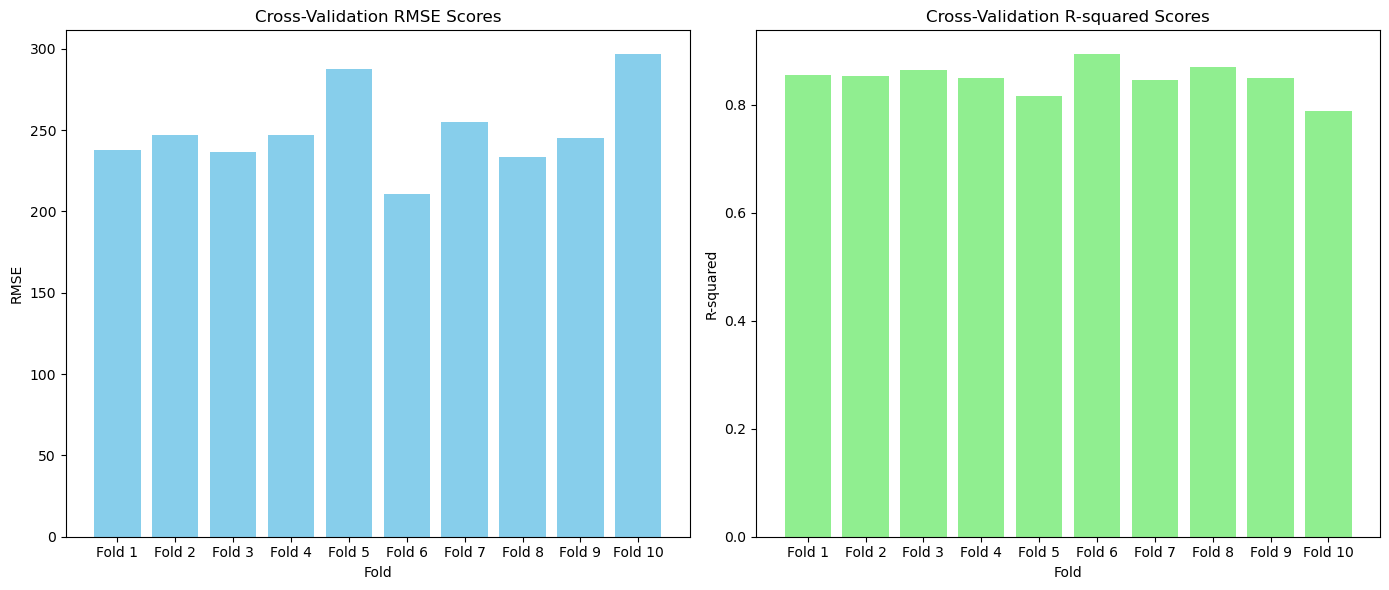

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Initialize a Random Forest regressor
regressor = RandomForestRegressor(random_state=42)

# Define scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform K-Fold Cross Validation for RMSE
cv_mse_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=mse_scorer)
cv_rmse_scores = (-cv_mse_scores)**0.5

# Perform K-Fold Cross Validation for R-squared
cv_r2_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=r2_scorer)

# Print the cross-validation scores
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean CV RMSE:", cv_rmse_scores.mean())
print("Cross-validation R-squared scores:", cv_r2_scores)
print("Mean CV R-squared:", cv_r2_scores.mean())

# Visualization

# Plot RMSE
plt.figure(figsize=(14, 6))

# Plot RMSE
plt.subplot(1, 2, 1)
plt.bar(np.arange(len(cv_rmse_scores)), cv_rmse_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores')
plt.xticks(np.arange(len(cv_rmse_scores)), [f'Fold {i+1}' for i in range(len(cv_rmse_scores))])

# Plot R-squared
plt.subplot(1, 2, 2)
plt.bar(np.arange(len(cv_r2_scores)), cv_r2_scores, color='lightgreen')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('Cross-Validation R-squared Scores')
plt.xticks(np.arange(len(cv_r2_scores)), [f'Fold {i+1}' for i in range(len(cv_r2_scores))])

# Show plots
plt.tight_layout()
plt.show()

# SUPPORT VECTOR MACHINE MODEL

Cross-validation RMSE scores: [529.59920149 557.23072553 554.05283963 541.99568878 588.20297581
 544.59533831 554.88807314 545.8757043  536.20426749 548.58768914]
Mean CV RMSE: 550.1232503626459
Cross-validation R-squared scores: [0.28122602 0.25519161 0.25474369 0.28056039 0.23078632 0.28851815
 0.27047332 0.29324649 0.28179827 0.27657498]
Mean CV R-squared: 0.2713119246794027


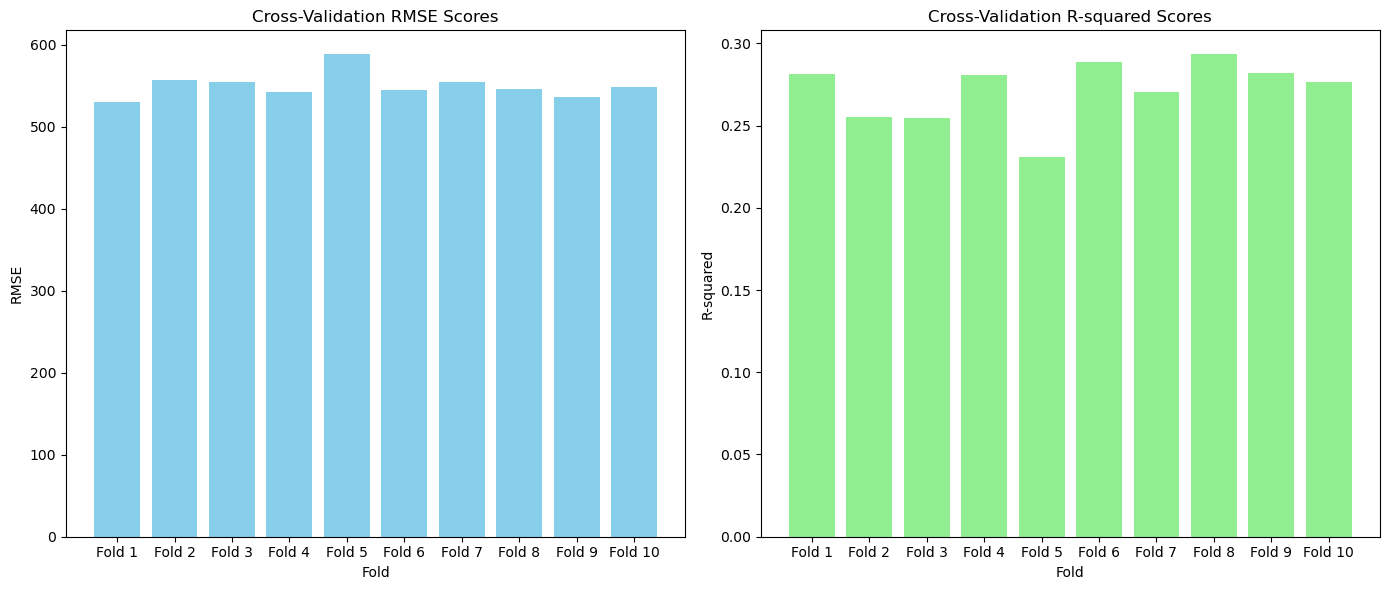

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Initialize an SVM regressor
regressor = SVR()

# Define scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform K-Fold Cross Validation for RMSE
cv_mse_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=mse_scorer)
cv_rmse_scores = (-cv_mse_scores)**0.5

# Perform K-Fold Cross Validation for R-squared
cv_r2_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=r2_scorer)

# Print the cross-validation scores
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean CV RMSE:", cv_rmse_scores.mean())
print("Cross-validation R-squared scores:", cv_r2_scores)
print("Mean CV R-squared:", cv_r2_scores.mean())

# Visualization

# Plot RMSE
plt.figure(figsize=(14, 6))

# Plot RMSE
plt.subplot(1, 2, 1)
plt.bar(np.arange(len(cv_rmse_scores)), cv_rmse_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores')
plt.xticks(np.arange(len(cv_rmse_scores)), [f'Fold {i+1}' for i in range(len(cv_rmse_scores))])

# Plot R-squared
plt.subplot(1, 2, 2)
plt.bar(np.arange(len(cv_r2_scores)), cv_r2_scores, color='lightgreen')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('Cross-Validation R-squared Scores')
plt.xticks(np.arange(len(cv_r2_scores)), [f'Fold {i+1}' for i in range(len(cv_r2_scores))])

# Show plots
plt.tight_layout()
plt.show()

# XGBOOST MODEL

Cross-validation RMSE scores: [224.93208329 229.57601356 232.65948618 221.00793577 259.66278311
 207.72259481 232.52350109 219.52839133 232.18132164 272.98818015]
Mean CV RMSE: 233.27822909236224
Cross-validation R-squared scores: [0.87034164 0.8735766  0.86858504 0.88037597 0.85009643 0.89648973
 0.87189558 0.88569589 0.86533942 0.82086143]
Mean CV R-squared: 0.8683257735340645


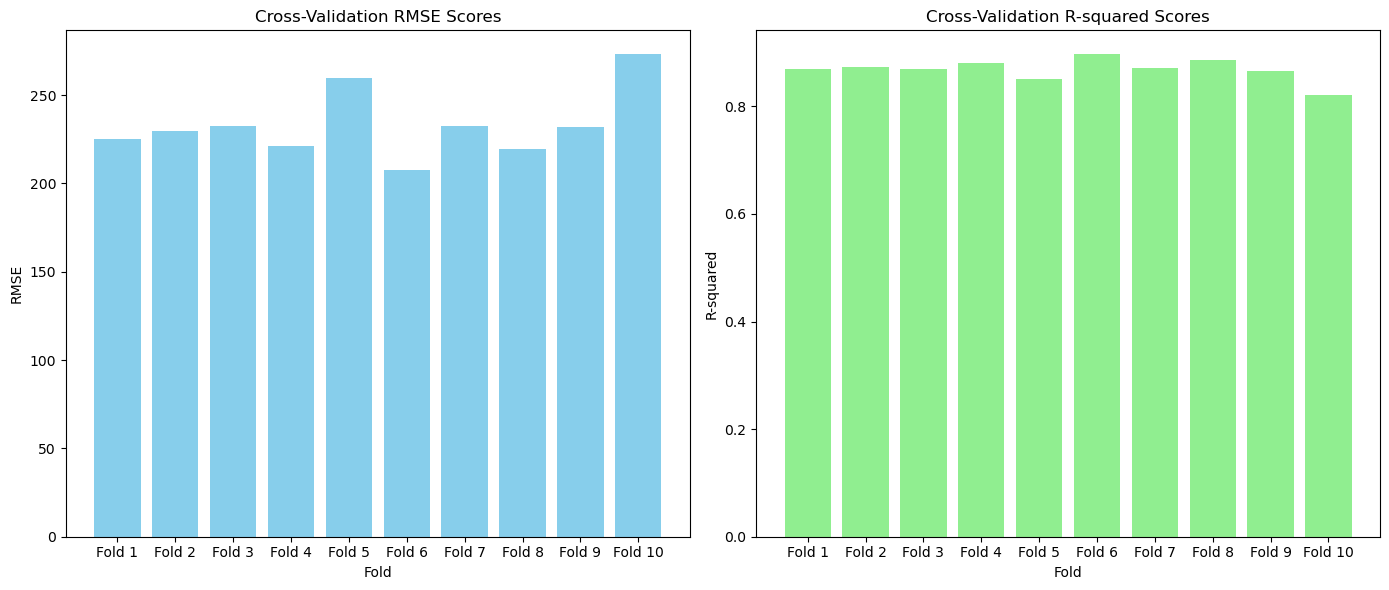

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Initialize an XGBoost regressor
regressor = xgb.XGBRegressor(eval_metric='mlogloss', random_state=42)

# Define scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform K-Fold Cross Validation for RMSE
cv_mse_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=mse_scorer)
cv_rmse_scores = (-cv_mse_scores)**0.5

# Perform K-Fold Cross Validation for R-squared
cv_r2_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=r2_scorer)

# Print the cross-validation scores
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean CV RMSE:", cv_rmse_scores.mean())
print("Cross-validation R-squared scores:", cv_r2_scores)
print("Mean CV R-squared:", cv_r2_scores.mean())

# Visualization

# Plot RMSE
plt.figure(figsize=(14, 6))

# Plot RMSE
plt.subplot(1, 2, 1)
plt.bar(np.arange(len(cv_rmse_scores)), cv_rmse_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores')
plt.xticks(np.arange(len(cv_rmse_scores)), [f'Fold {i+1}' for i in range(len(cv_rmse_scores))])

# Plot R-squared
plt.subplot(1, 2, 2)
plt.bar(np.arange(len(cv_r2_scores)), cv_r2_scores, color='lightgreen')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('Cross-Validation R-squared Scores')
plt.xticks(np.arange(len(cv_r2_scores)), [f'Fold {i+1}' for i in range(len(cv_r2_scores))])

# Show plots
plt.tight_layout()
plt.show()

# LIGHT GBM MODEL

Cross-validation RMSE scores: [220.4717176  234.44142415 216.18674503 237.72550397 268.41681257
 196.08554111 231.26808736 215.5754831  240.61312752 270.23476402]
Mean CV RMSE: 233.10192064135813
Cross-validation R-squared scores: [0.87543286 0.86816123 0.88653513 0.86159422 0.83981863 0.90776258
 0.87327514 0.88977524 0.85538127 0.82445687]
Mean CV R-squared: 0.8682193170037801


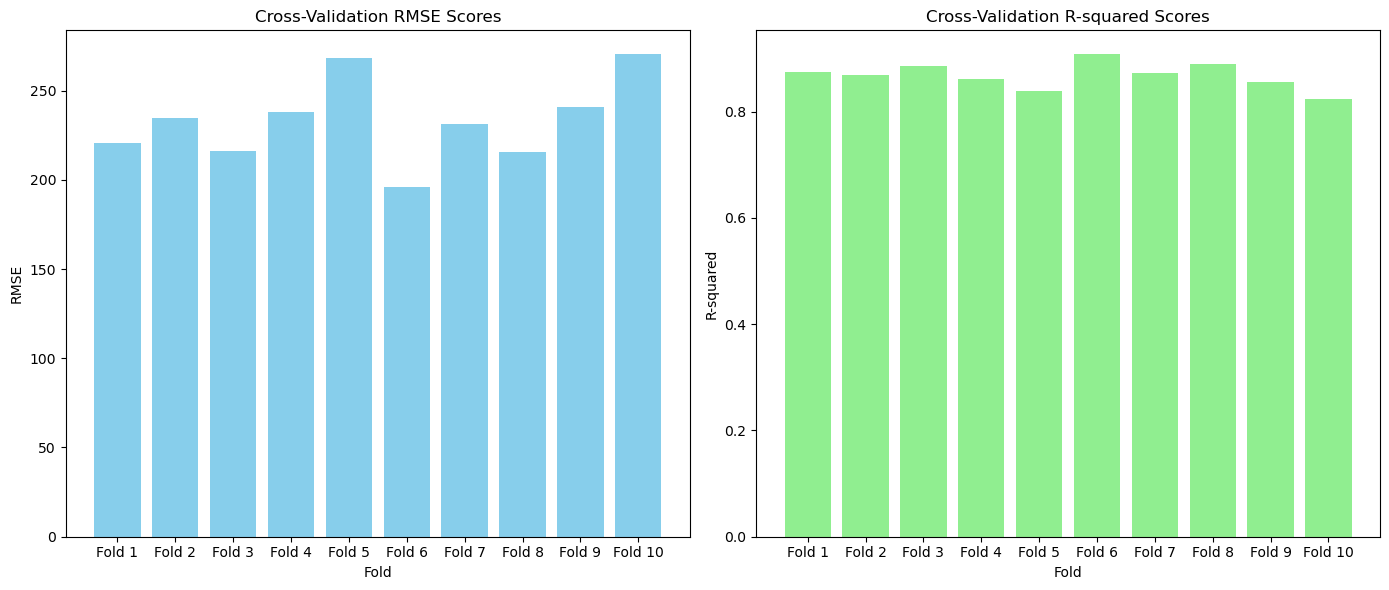

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Initialize a LightGBM regressor
regressor = lgb.LGBMRegressor(random_state=42, verbose=0)

# Define scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform K-Fold Cross Validation for RMSE
cv_mse_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=mse_scorer)
cv_rmse_scores = (-cv_mse_scores)**0.5

# Perform K-Fold Cross Validation for R-squared
cv_r2_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=r2_scorer)

# Print the cross-validation scores
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean CV RMSE:", cv_rmse_scores.mean())
print("Cross-validation R-squared scores:", cv_r2_scores)
print("Mean CV R-squared:", cv_r2_scores.mean())

# Visualization

# Plot RMSE
plt.figure(figsize=(14, 6))

# Plot RMSE
plt.subplot(1, 2, 1)
plt.bar(np.arange(len(cv_rmse_scores)), cv_rmse_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores')
plt.xticks(np.arange(len(cv_rmse_scores)), [f'Fold {i+1}' for i in range(len(cv_rmse_scores))])

# Plot R-squared
plt.subplot(1, 2, 2)
plt.bar(np.arange(len(cv_r2_scores)), cv_r2_scores, color='lightgreen')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('Cross-Validation R-squared Scores')
plt.xticks(np.arange(len(cv_r2_scores)), [f'Fold {i+1}' for i in range(len(cv_r2_scores))])

# Show plots
plt.tight_layout()
plt.show()

# GridSearch

In [47]:
from sklearn.model_selection import GridSearchCV

# Initialize a LightGBM regressor
regressor = lgb.LGBMRegressor(random_state=42, verbose=0)

# Define a parameter grid for grid search
param_grid = {
    'num_leaves': [31, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=regressor, 
                           param_grid=param_grid, 
                           scoring=mse_scorer,  # You can change this to r2_scorer if you want to optimize for R-squared
                           cv=10,  # 10-fold cross-validation
                           n_jobs=-1,  # Use all available cores
                           verbose=1)

# Fit the grid search model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found by GridSearch:", best_params)
print("Best CV RMSE score found by GridSearch:", (-best_score)**0.5)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best parameters found by GridSearch: {'learning_rate': 0.1, 'n_estimators': 500, 'num_leaves': 31}
Best CV RMSE score found by GridSearch: 223.1352880838412


D:\DS\Anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test RMSE: 207.6191990703684
Test R-squared: 0.8965411710910829


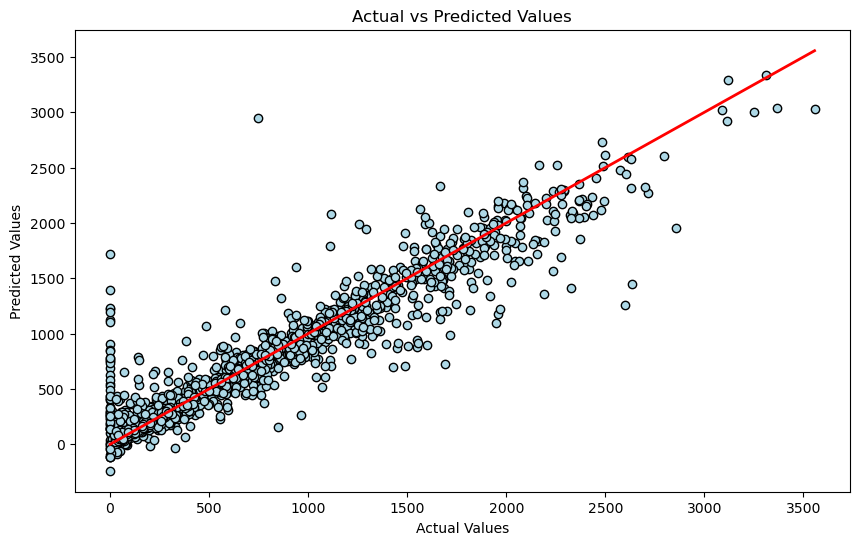

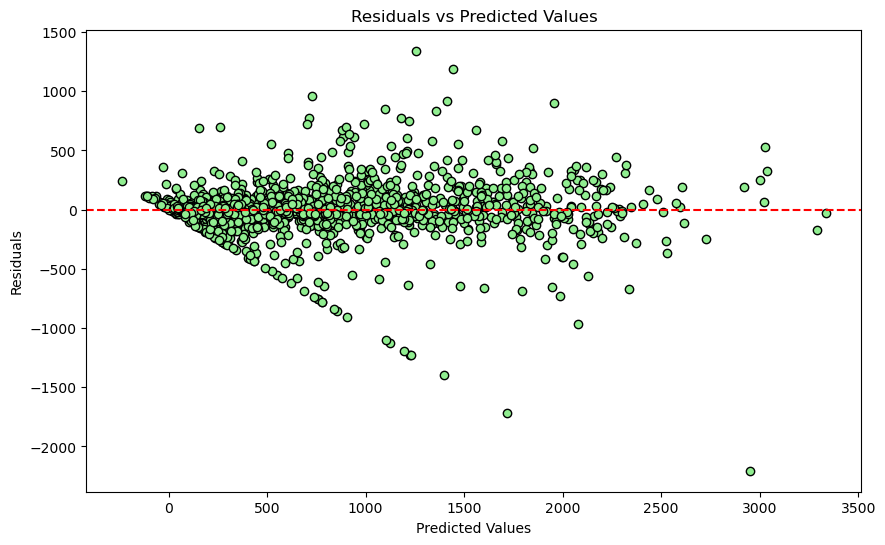

In [49]:
# Fit the best model on the entire training data
best_regressor = grid_search.best_estimator_
best_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = best_regressor.predict(X_test_scaled)

# Evaluate the model on the test set
test_rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
test_r2 = r2_score(y_test, y_pred)  # R-squared

print("Test RMSE:", test_rmse)
print("Test R-squared:", test_r2)

# Optionally, you can visualize the results similar to your cross-validation visualization

# Visualization

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='lightblue', edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Plot residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='lightgreen', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


# Feature Importance Measures

C:\Users\Marcin Krawczyk\AppData\Local\Temp\ipykernel_24140\2953959867.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_data, palette='viridis')


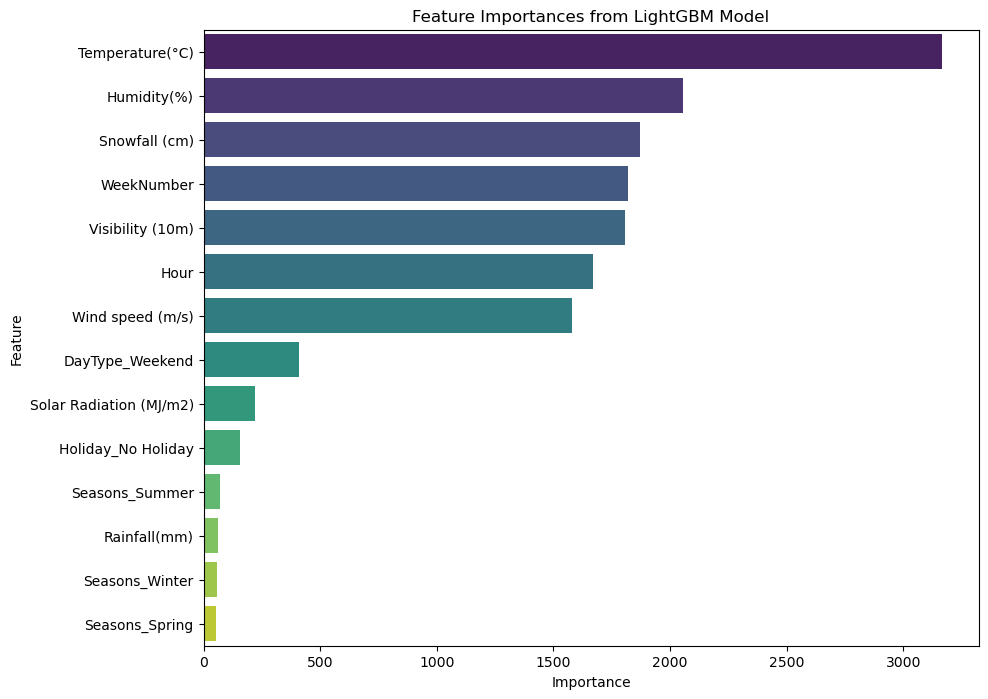

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'best_regressor' is the best model from GridSearchCV
# Retrieve feature importances
feature_importances = best_regressor.feature_importances_

# Manually define the feature names if you know them
feature_names = [
    'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'WeekNumber',
    'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 
    'Snowfall (cm)', 'DayType_Weekend', 'Holiday_No Holiday', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter'
]

# Check if the length of feature_names matches the length of feature_importances
if len(feature_names) != len(feature_importances):
    raise ValueError("The number of feature names does not match the number of feature importances.")

# Create a DataFrame for better visualization
importance_data = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_data = importance_data.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_data, palette='viridis')
plt.title('Feature Importances from LightGBM Model')
plt.show()



C:\Users\Marcin Krawczyk\AppData\Local\Temp\ipykernel_24140\3864799352.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_data, palette='viridis')


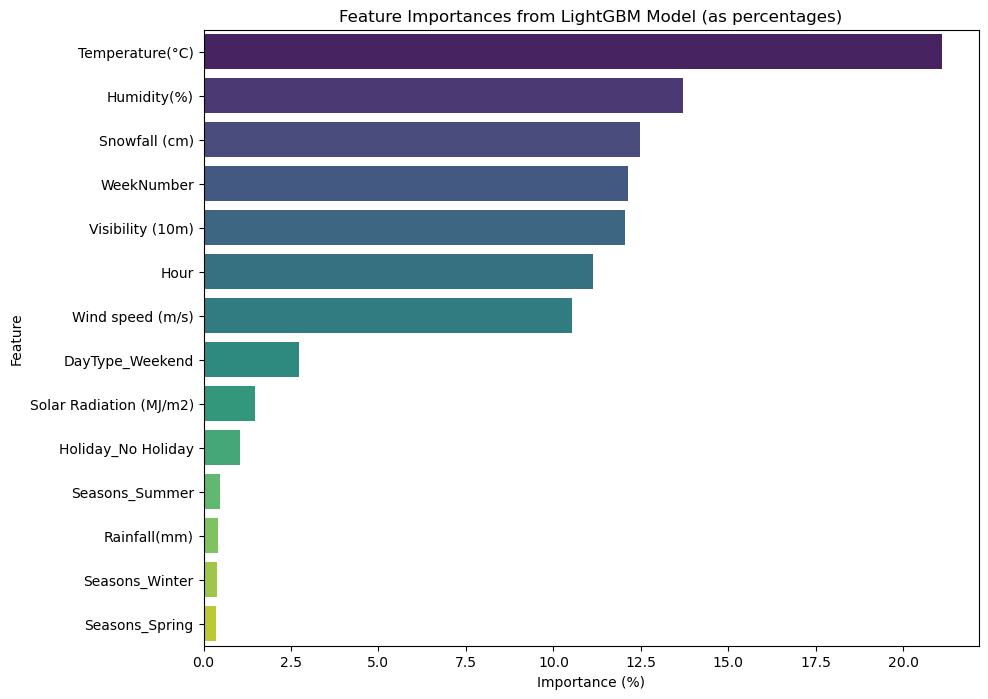

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'best_regressor' is the best model from GridSearchCV
# Retrieve feature importances
feature_importances = best_regressor.feature_importances_

# Manually define the feature names if you know them
feature_names = [
    'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'WeekNumber',
    'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 
    'Snowfall (cm)', 'DayType_Weekend', 'Holiday_No Holiday', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter'
]

# Check if the length of feature_names matches the length of feature_importances
if len(feature_names) != len(feature_importances):
    raise ValueError("The number of feature names does not match the number of feature importances.")

# Convert feature importances to percentages
feature_importances_percent = 100.0 * (feature_importances / feature_importances.sum())

# Create a DataFrame for better visualization
importance_data = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_percent
})

# Sort the DataFrame by importance
importance_data = importance_data.sort_values(by='Importance', ascending=False)

# Plot feature importances as percentages
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_data, palette='viridis')
plt.title('Feature Importances from LightGBM Model (as percentages)')
plt.xlabel('Importance (%)')  # Update the x-label to reflect percentage
plt.show()